In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,TensorDataset

from matplotlib import colors
from IPython import display
import os
from torch.utils.data.dataset import Dataset
from matplotlib.pyplot import imread
import glob
import os
import random
from sklearn.preprocessing import LabelEncoder

from torchvision.models import alexnet, vgg16, resnet152, resnet18, vgg19

%matplotlib inline

from torch.distributions.utils import lazy_property
import math
import h5py
from PIL import Image


import torch.nn.functional as nnf
from torch.utils.data import random_split
from torch.optim import SGD 
from torch.distributions import constraints
import torchvision as torchv
import torchvision.transforms as torchvt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df_hb_train = pd.read_csv('mitbih_train.csv', header=None)
df_hb_test = pd.read_csv('mitbih_test.csv', header=None)

In [15]:
df_hb_test.shape

(21892, 188)

In [3]:
df_hb_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [4]:
df_hb_test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [5]:
df_hb_train[df_hb_train[187] == 3]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
80482,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80483,0.732252,1.000000,0.983773,0.484787,0.178499,0.111562,0.081136,0.050710,0.046653,0.046653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80484,0.991984,1.000000,0.601202,0.280561,0.158317,0.146293,0.104208,0.090180,0.080160,0.070140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80485,0.778378,0.528378,0.258108,0.128378,0.000000,0.037838,0.167568,0.235135,0.227027,0.222973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80486,1.000000,0.914931,0.531250,0.303819,0.178819,0.157986,0.128472,0.126736,0.118056,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81118,0.771529,1.000000,0.776801,0.316344,0.165202,0.124780,0.117750,0.108963,0.084359,0.091388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81119,0.590000,0.373333,0.283333,0.303333,0.340000,0.263333,0.136667,0.120000,0.090000,0.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81120,1.000000,0.939286,0.553571,0.285714,0.166071,0.141071,0.112500,0.108929,0.094643,0.096429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81121,1.000000,0.964981,0.778210,0.513619,0.214008,0.090791,0.112840,0.097276,0.075227,0.070039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [6]:
df_hb_train.shape

(87554, 188)

In [7]:
df_hb_test.shape

(21892, 188)

In [3]:
x_train = df_hb_train.iloc[:,:187]
x_test = df_hb_test.iloc[:,:187]

In [12]:
# def add_gaussian_noise(signal):
#     noise=np.random.normal(0,0.05,187)
#     return (signal+noise)

In [13]:
# x_train = add_gaussian_noise(x_train)

In [4]:
# For exploratory purpose only
gasf = GramianAngularField(image_size=187, method='summation')
x_gasf_train = gasf.fit_transform(x_train)
x_gasf_test = gasf.transform(x_test)

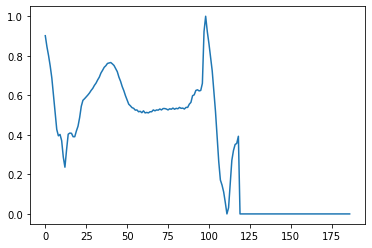

In [14]:
x_train.values[87553, :]
plt.plot(np.arange(187), x_train.values[87553, :])

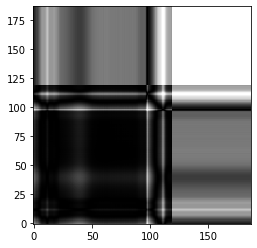

In [14]:
plt.imshow(x_gasf_train[87553], cmap='gray', origin='lower')

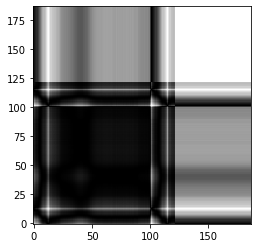

In [11]:
plt.imshow(x_gasf_test[21891], cmap='gray', origin='lower')

In [13]:
# Test
# def recurrence_plot(s, eps=None, steps=None):
#     result = []
#     if eps==None: eps=0.1
#     if steps==None: steps=10
#     for i in range(s.shape[0]):
#         d = pairwise_distances(s[i][:, None])
#     #     d = np.floor(d / eps)
#         d = d / eps
# #         print(d.shape)
#         d[d > steps] = steps
#         result.append(d/5. - 1)
#     #Z = squareform(d)
#     return np.array(result)

In [12]:
def recurrence_plot(s, eps=None, steps=None):
    result = []
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s[:, None])
#     d = np.floor(d / eps)
    d = d / eps
#         print(d.shape)
    d[d > steps] = steps
    #Z = squareform(d)
    return d/5. - 1

In [15]:
result = recurrence_plot(x_train.values[87553], steps=10)

In [16]:
result.shape

(187, 187)

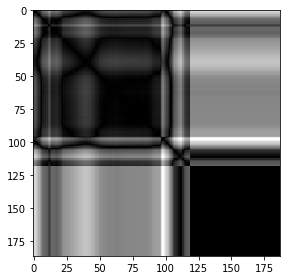

In [17]:
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(result, cmap='gray')

(187, 187)
(187, 187)


array([[-1.        ],
       [-0.66442955],
       [ 0.14093959],
       ...,
       [-1.        ],
       [-1.        ],
       [-1.        ]])

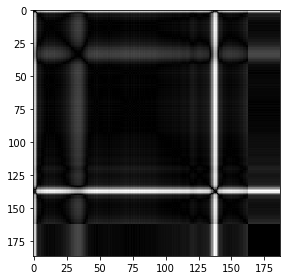

In [19]:
# Test

fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(x_train.values[25][:, None], steps=10), cmap='gray')
d = recurrence_plot(x_train.values[25][:, None], steps=10)
scaler = MinMaxScaler((-1, 1))
# d.reshape(187 * 187, 1)
x = scaler.fit_transform(d.reshape(187 * 187, 1))
# x.min()
x

In [20]:
d[d > 10]

array([], dtype=float64)

In [114]:
d.reshape(187 * 187, 1)

array([[0.        ],
       [0.16778523],
       [0.5704698 ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [115]:
data = [[.3], [.2], [.4]]
scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[ 0.        ],
       [-1.22474487],
       [ 1.22474487]])

In [5]:
y_train = df_hb_train[187].values.astype(int)
y_test = df_hb_test[187].values.astype(int)

In [1]:
# with h5py.File('hb_data_mit_bih.hdf5', mode='w') as hdf5_file:
#     hdf5_file.create_dataset("x_train", (len(x_gasf_train), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_train", (len(y_train),), np.int32)
#     hdf5_file.create_dataset("x_test", (len(x_gasf_test), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
#     transform = transforms.Compose([transforms.Resize((224, 224))])
    
#     for i, (x, y) in enumerate(zip(x_gasf_train, y_train)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_train"][i, ...] = t
#         hdf5_file["y_train"][i] = y

#     for i, (x, y) in enumerate(zip(x_gasf_test, y_test)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_test"][i, ...] = t
#         hdf5_file["y_test"][i] = y

In [89]:
# smt = SMOTE(sampling_strategy={1:20000, 2: 20000, 3: 20000, 4: 20000}, n_jobs=-1, random_state=42)
# x_smt, y_smt = smt.fit_sample(x_train, y_train)
# nms = NearMiss(sampling_strategy={0:20000}, n_jobs=-1)
# x_train_bln, y_train_bln = nms.fit_resample(x_smt, y_smt)

In [95]:
# smt_test = SMOTE(sampling_strategy={1: 819, 3: 819}, n_jobs=-1, random_state=42)
# x_smt_test, y_smt_test = smt_test.fit_sample(x_test, y_test)
# nms_test = NearMiss(sampling_strategy={0:819, 2:819, 4:819}, n_jobs=-1)
# x_test_bln, y_test_bln = nms_test.fit_resample(x_smt_test, y_smt_test)

In [101]:
# gasf = GramianAngularField(image_size=187, method='summation')
# x_gasf_train_bln = gasf.fit_transform(x_train_bln)
# x_gasf_test_bln = gasf.transform(x_test_bln)

In [2]:
# plt.imshow(x_gasf_test_bln[1000], cmap='gray', origin='lower')

In [107]:
# with h5py.File('hb_data_mit_bih_balanced.hdf5', mode='w') as hdf5_file:
#     hdf5_file.create_dataset("x_train", (len(x_gasf_train_bln), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_train", (len(y_train_bln),), np.int32)
#     hdf5_file.create_dataset("x_test", (len(x_gasf_test_bln), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_test", (len(y_test_bln),), np.int32)
    
#     transform = transforms.Compose([transforms.Resize((224, 224))])
    
#     for i, (x, y) in enumerate(zip(x_gasf_train_bln, y_train_bln)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_train"][i, ...] = t
#         hdf5_file["y_train"][i] = y

#     for i, (x, y) in enumerate(zip(x_gasf_test_bln, y_test_bln)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_test"][i, ...] = t
#         hdf5_file["y_test"][i] = y

In [11]:
# upsampling
smt2 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_2, y_train_2 = smt2.fit_sample(x_train, y_train)

gasf = GramianAngularField(image_size=150, method='summation')
x_gasf_train_2 = gasf.fit_transform(x_train_2)
x_gasf_test_2 = gasf.transform(x_test)

In [12]:
with h5py.File('hb_data_mit_bih_balanced_2.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_2, y_train_2)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_2, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [6]:
# upsampling to try with GramianAngularField method='difference'
# results are almost same for both
smt3 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_3, y_train_3 = smt3.fit_sample(x_train, y_train)

gasf = GramianAngularField(image_size=150, method='difference')
x_gasf_train_3 = gasf.fit_transform(x_train_3)
x_gasf_test_3 = gasf.transform(x_test)

In [10]:
with h5py.File('hb_data_mit_bih_balanced_3.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_3, y_train_3)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_3, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [7]:
smt2 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_2, y_train_2 = smt2.fit_sample(x_train, y_train)

In [16]:
with h5py.File('hb_data_mit_bih_balanced_rp.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_train_2.values, y_train_2)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_test.values, y_test)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [8]:
with h5py.File('/media/asif/data/hb_data_mit_bih_balanced_mixed.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        hdf5_file["x_train"][i, 0, ...] = t
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = (t + t2) / 2
        hdf5_file["y_train"][i] = y

    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        hdf5_file["x_test"][i, 0, ...] = t
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = (t + t2) / 2
        hdf5_file["y_test"][i] = y

In [12]:
np.array(a)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [12]:
a = np.array([ [[1,2], [3,4], [1,2]],
               [[5,6], [7,8], [5,6]],
               [[8,9], [10,11], [12, 13]]])
a.shape

(3, 3, 2)

In [14]:
transforms.ToTensor()(a).shape

torch.Size([2, 3, 3])